In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%tensorflow_version 1.x
import cv2
import numpy as np
import tensorflow as tf
import pickle 

from keras.datasets import mnist
from keras.layers import Input ,Dense,Activation, Conv2D,AveragePooling2D,Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')




In [ ]:
def load_dataset():

  pickle_X_train = open("/content/drive/MyDrive/Colab Notebooks/train_x.pickle", "rb")
  pickle_X_test = open("/content/drive/MyDrive/Colab Notebooks/test_x.pickle", "rb")
  pickle_Y_train = open("/content/drive/MyDrive/Colab Notebooks/train_y.pickle", "rb")
  pickle_Y_test = open("/content/drive/MyDrive/Colab Notebooks/test_y.pickle", "rb")

  X = pickle.load(pickle_X_train)
  X_test = pickle.load(pickle_X_test)
  Y = pickle.load(pickle_Y_train)
  Y_test = pickle.load(pickle_Y_test)

  pickle_X_train.close()
  pickle_Y_train.close()
  pickle_X_test.close()
  pickle_Y_test.close()
  return (X, Y), (X_test, Y_test)

def load_dataset_train():

  pickle_X_train = open("/content/drive/MyDrive/Colab Notebooks/train_x.pickle", "rb")
  pickle_Y_train = open("/content/drive/MyDrive/Colab Notebooks/train_y.pickle", "rb")

  X = pickle.load(pickle_X_train)
  Y = pickle.load(pickle_Y_train)

  pickle_X_train.close()
  pickle_Y_train.close()
  return (X, Y)

In [ ]:
(x_train, y_train) = load_dataset_train()
train_x, test_x, train_y, test_y  = train_test_split(x_train, y_train , test_size=0.1, shuffle=True, random_state=5)
image_size = x_train.shape[1]

x_train = x_train.astype('float32')/255
test_x = test_x.astype('float32')/255
print(x_train.shape)

(1788, 200, 200, 3)


In [ ]:
# x_train = x_train.reshape((-1,28,28,1))
# x_test = x_test.reshape((-1,28,28,1))
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [ ]:
print("train_x shape is {}".format( train_x.shape ))
print("train_y shape is {}".format( train_y.shape ))
print("test_x shape is {}".format( test_x.shape ))
print("test_y shape is {}".format( test_y.shape ))

train_x shape is (1609, 200, 200, 3)
train_y shape is (1609, 2)
test_x shape is (179, 200, 200, 3)
test_y shape is (179, 2)


In [ ]:
def build_model(input_shape):
  
  x_input = Input(shape =input_shape,name = 'input')

  x = Conv2D(filters = 16,kernel_size = (2,2), strides = 1, padding = 'valid',name = 'conv2')(x_input)
  x = Activation('relu')(x)
  x = AveragePooling2D(pool_size =2,strides = 2,name = 'pad2')(x)

  x = Flatten()(x)

  x = Dense(units = 120, name = 'fc_1')(x)

  x = Activation('relu', name = 'relu_1')(x)
  # x = Dropout(rate = 0.5)

  x = Dense(units = 84, name = 'fc_2')(x)
  x = Activation('relu', name = 'relu_2')(x)
  # x = Dropout(rate = 0.5)


  outputs = Dense(units = 2,name = 'softmax', activation='softmax')(x)
  
  model = Model(inputs = x_input, outputs = outputs)
  model.summary()

  return model
  

In [ ]:
model = build_model(input_shape=(200, 200, 3))
model.compile(optimizer = 'adam', loss='categorical_crossentropy' ,metrics = ['accuracy'])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 200, 200, 3)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 199, 199, 16)      208       
_________________________________________________________________
activation_1 (Activation)    (None, 199, 199, 16)      0         
_________________________________________________________________
pad2 (AveragePooling2D)      (None, 99, 99, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 156816)            0         
_________________________________________________________________
fc_1 (Dense)                 (None, 120)               18818040  
___________________________________________

In [ ]:
datagen = ImageDataGenerator(
          rotation_range=45,
          width_shift_range=0.2,
          height_shift_range=0.2,
          zoom_range=0.2,
          horizontal_flip=True,
          fill_mode='nearest')

batch_size = 64
 
H = model.fit_generator(datagen.flow(train_x, train_y, batch_size=batch_size),
  validation_data=(test_x, test_y),                       
	steps_per_epoch=len(train_y) // batch_size, epochs=22)

Epoch 1/20
25/25 [==============================] - 12s 461ms/step - loss: 3.9854 - accuracy: 0.9502 - val_loss: 0.5633 - val_accuracy: 0.7486
Epoch 2/20
 2/25 [=>............................] - ETA: 10s - loss: 7.7486 - accuracy: 0.9219

KeyboardInterrupt: ignored

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


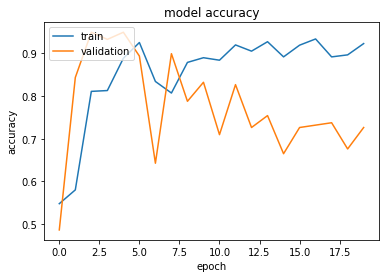

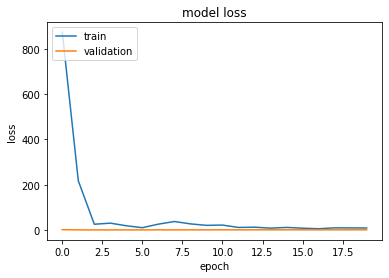

In [ ]:
print(H.history.keys())
#  "Accuracy"
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

1


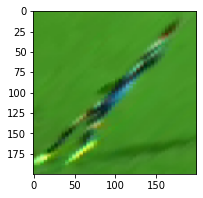

In [ ]:
sample = test_x[np.random.randint(len(test_x))]


batch = np.expand_dims(sample, axis=0)
prediction = model.predict(batch)
print(   np.argmax(prediction[0])    )

# sample_show = sample.reshape((28,28))
plt.figure(figsize=(3,3))
sample = sample[:,:,::-1]
plt.imshow(sample)
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/Model.h5")

In [ ]:
model.save_weights("/content/drive/MyDrive/Colab Notebooks/model_weights.h5")
